# Reading Recipes with PyTesseract 
---
This is my attempt to test out how we can best translate photos of Cooks Illustrated magazines into text represenatations of recipes.

In [18]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
FILE_PATH = '/home/ryan/Pictures/test_samples/'
NUM_FILES = 9 # Number of files, named recipeN.jpeg

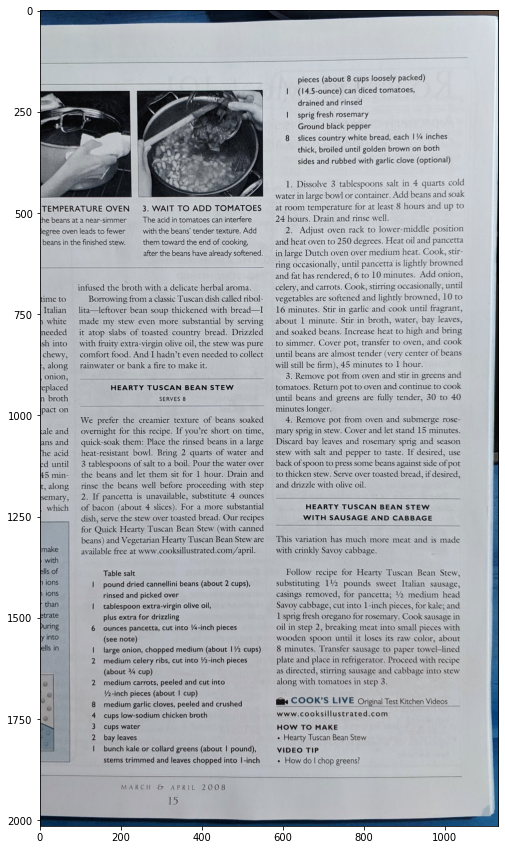

TEMPERATURE OVEN
the beans at a near-simmer
legree oven leads to fewer
beans in the finished stew.

3. WAIT TO ADD TOMATOES
The acid in tomatoes can interfere
with the beans’ tender texture. Add
them toward the end of cooking,
after the beans have already softened.

time to
Tralian
1 white
needed
ish into
chewy,
>, along
, onion,
eplaced
n broth
pact on

cale and
ans and
‘he acid
ed until
45 min-
t, along
semary,
which

make
» with
ells of
n ions
1 ions
r than
etrate
During.
y into
ells in

infused the broth with a delicate herbal aroma.

Borrowing from a classic Tuscan dish called ribol-
lita—leftover bean soup thickened with bread—I
made my stew even more substantial by serving
it atop slabs of toasted country bread. Drizzled
with fruity extra-virgin olive oil, the stew was pure
comfort food. And I hadn’t even needed to collect
rainwater or bank a fire to make it.

HEARTY TUSCAN BEAN STEW
SERVES 8

We prefer the creamier texture of beans soaked
overnight for this recipe. If you’re sh

In [10]:
FILE = '/home/ryan/Pictures/test_samples/recipe1.jpg'
# Basic reading and displaying the image as seen by our code
img = cv2.imread(FILE)
plt.figure(figsize=(25,15))
plt.imshow(img, cmap='gray')
plt.show()
print(pytesseract.image_to_string(img))

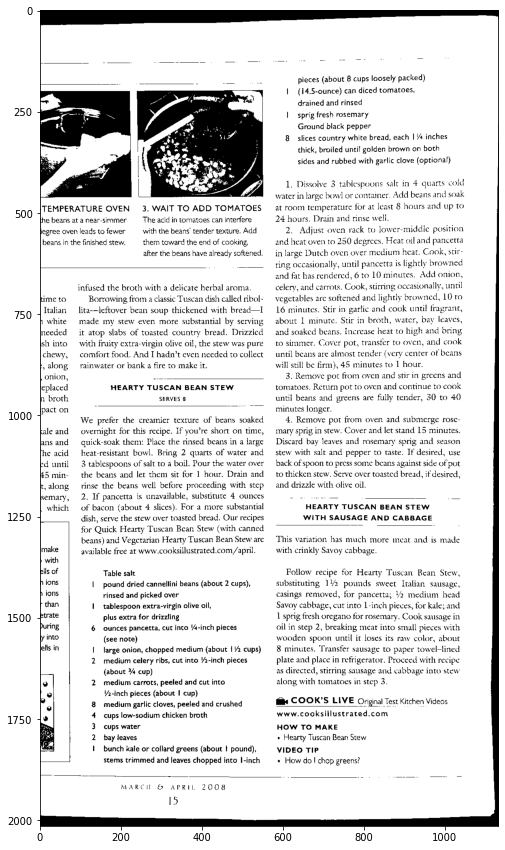

‘TEMPERATURE OVEN
the beans at a near-simmer
legree oven leads to fewer
beans in the finished stew.

3. WAIT TO ADD TOMATOES
The acid in tomatoes can interfere
with the beans’ tender texture. Add

them toward the end of cooking,
after the beans have already softened,

time to
Tralian
1 white
needed
ish into
chewy,
-, along
, onion,
eplaced
n broth
pact on

cale and
ans and
‘he acid
ed until
45 min-
t, along
semary,
which

make
> with
ells of
pions
1 ions
r chan
etrate
During
y into
ells in

infused the broth with a delicate herbal aroma.

Borrowing from a classic Tuscan dish called ribol-
lita—leftover bean soup thickened with bread—I
made my stew even more substantial by serving
it atop slabs of toasted country bread. Drizzled
with fruity extra-virgin olive oil, the stew was pure
comfort food. And I hadn’t even needed to collect
rainwater or bank a fire to make it.

HEARTY TUSCAN BEAN STEW
SERVES 8

We prefer the creamier texture of beans soaked
overnight for this recipe. If you’re sh

In [11]:
# Using threshold  approach
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, new_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
plt.figure(figsize=(25,15))
plt.imshow(new_img, cmap='gray')
plt.show()
print(pytesseract.image_to_string(new_img))

In [24]:
# Drawing rectangles around chunks of text to classify them
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

# Applying dialation using our new kernel
dilated_img = cv2.dilate(new_img, rect_kernel, iterations=1)
# plt.figure(figsize=(25,15))
# plt.imshow(dilated_img)
# plt.show()

# Find countors
contours, hierarchy = cv2.findContours(dilated_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
copy_img = img.copy()

OUTPUT_FILE = 'output.txt'
with open(OUTPUT_FILE, 'w+') as f:
    f.write("")
f.close()

mask = np.zeros(img.shape, np.uint8)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cropped = copy_img[y:y+h, x:x+w]
    
    with open(OUTPUT_FILE, "a") as f:
        text = pytesseract.image_to_string(cropped, config="--oem 3 --psm 3")
        print(text)
#         print('-'*30)
    masked = cv2.drawContours(mask, [cnt], 0, (255,255,255), -1)
    
# plt.figure(figsize=(25,15))
# plt.imshow(masked, cmap='gray')
# plt.show()












TEMPERATURE OVEN
the beans at a near-simmer
legree oven leads to fewer
beans in the finished stew.

3. WAIT TO ADD TOMATOES
The acid in tomatoes can interfere
with the beans’ tender texture. Add

them toward the end of cooking,
after the beans have already softened.

time to
Tralian
1 white
needed
ish into
chewy,
>, along
, onion,
eplaced
n broth
pact on

cale and
ans and
‘he acid
ed until
45 min-
t, along,
semary,
which

make
» with
ells of
n ions
1 ions
r than
etrate
During.
y into
ells in

infused the broth with a delicate herbal aroma.

Borrowing from a classic Tuscan dish called ribol-
lita—leftover bean soup thickened with bread—I
made my stew even more substantial by serving
it atop slabs of toasted country bread. Drizzled
with fruity extra-virgin olive oil, the stew was pure
comfort food. And I hadn’t even needed to collect
rainwater or bank a fire to make it.

HEARTY TUSCAN BEAN STEW
SERVES 8

We prefer the creamier texture of beans soaked
overnight for this recipe.

In [1]:
[i for i in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]